In [25]:
#Import dependecies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Read the datasets
teams_df = pd.read_csv("./Resources/NFL_team_data.csv")


capacity_df = pd.read_csv("./Resources/nfl_stadiums.csv")
capacity_df.dtypes


Name          object
Capacity     float64
Location      object
Surface       object
Roof type     object
Team(s)       object
Opened         int64
dtype: object

In [5]:
#Align column names to merge data 
capacity_df = capacity_df.rename(columns={'Team(s)':'team_name'})
stadium_df = pd.merge(teams_df, capacity_df, on='team_name',how="left")
stadium_df

,team_name,home_stadium,location,lat,long,mascot,live_mascots,conference,division,superbowl_wins,year_est,Name,Capacity,Location,Surface,Roof type,Opened
0,Buffalo Bills,Highmark Stadium,"Ochard Park, New York",42.773773,-78.787460,Buffalo Billy,NaN,AFC,East,0,1959,New Era Field,71608.0,"Orchard Park, New York",A-Turf Titan 50,Open,1973.0
1,Miami Dolphins,Hard Rock Stadium,"Miami Gardens, Florida",25.957960,-80.239311,T.D.,NaN,AFC,East,2,1965,Hard Rock Stadium,65326.0,"Miami Gardens, Florida",Platinum TE Paspalum,Open,1987.0
2,New England Patriots,Gillete Stadium,"Foxborough, Massachusetts",42.087833,-71.258666,Pat Patriot,NaN,AFC,East,6,1959,Gillette Stadium,66829.0,"Foxborough, Massachusetts",FieldTurf CORE,Open,2002.0
3,New York Jets,MetLife Stadium,"East Rutherford, New Jersey",40.813778,-74.217121,NaN,NaN,AFC,East,1,1959,NaN,NaN,NaN,NaN,NaN,NaN
4,Denver Broncos,Empower Field at Mile High,"Denver, Colorado",39.744129,-105.020828,Miles,Thunder (Horse),AFC,West,3,1959,Empower Field at Mile High,76125.0,"Denver, Colorado",Kentucky bluegrass,Open,2001.0
5,Kansas City Chiefs,Arrowhead Stadium,"Kansas City, Missouri",39.048786,-94.484566,K.C. Wolf,NaN,AFC,West,3,1959,Arrowhead Stadium,76416.0,"Kansas City, Missouri",Bermuda grass,Open,1972.0
6,Las Vegas Raiders,Allegiant Stadium,"Paradise, Nevada",36.090794,-115.183952,Raider Rush,NaN,AFC,West,3,1960,NaN,NaN,NaN,NaN,NaN,NaN
7,Los Angeles Chargers,SoFi Stadium,"Inglewood, California",33.953587,-118.482441,NaN,NaN,AFC,West,0,1959,Dignity Health Sports Park,27000.0,"Carson, California",Bermuda grass,Open,2003.0
8,Baltimore Ravens,M&T Bank Stadium,"Baltimore, Maryland",39.278088,-76.623322,Poe,Rise and Conquer (Ravens),AFC,North,2,1996,M&T Bank Stadium,71008.0,"Baltimore, Maryland",Bermuda grass,Open,1998.0
9,Cincinnati Bengals,Paycor Stadium,"Cincinnati, Ohio",39.096306,-84.516846,Who Dey,NaN,AFC,North,0,1967,Paul Brown Stadium,65515.0,"Cincinnati, Ohio",UBU Speed Series S5-M Synthetic Turf,Open,2000.0


In [6]:
#Create a list for the column names 
columns = list(stadium_df)
columns

['team_name',
 'home_stadium',
 'location',
 'lat',
 'long',
 'mascot',
 'live_mascots',
 'conference',
 'division',
 'superbowl_wins',
 'year_est',
 'Name',
 'Capacity',
 'Location',
 'Surface',
 'Roof type',
 'Opened']

In [7]:
#Drop columns that will not be used 
stadium_df = stadium_df.drop(['team_name','Location', 'Surface','Roof type', 'Opened'], axis =1)
stadium_df = stadium_df.drop(['mascot', 'live_mascots', 'conference','division','year_est', 'Name','superbowl_wins'], axis =1)
stadium_df 

,home_stadium,location,lat,long,Capacity
0,Highmark Stadium,"Ochard Park, New York",42.773773,-78.787460,71608.0
1,Hard Rock Stadium,"Miami Gardens, Florida",25.957960,-80.239311,65326.0
2,Gillete Stadium,"Foxborough, Massachusetts",42.087833,-71.258666,66829.0
3,MetLife Stadium,"East Rutherford, New Jersey",40.813778,-74.217121,NaN
4,Empower Field at Mile High,"Denver, Colorado",39.744129,-105.020828,76125.0
5,Arrowhead Stadium,"Kansas City, Missouri",39.048786,-94.484566,76416.0
6,Allegiant Stadium,"Paradise, Nevada",36.090794,-115.183952,NaN
7,SoFi Stadium,"Inglewood, California",33.953587,-118.482441,27000.0
8,M&T Bank Stadium,"Baltimore, Maryland",39.278088,-76.623322,71008.0
9,Paycor Stadium,"Cincinnati, Ohio",39.096306,-84.516846,65515.0


In [8]:
#Adding missing capacity data 
stadium_df.loc[3,['Capacity']] = 82500.0
stadium_df.loc[6,['Capacity']] = 65500.0
stadium_df.loc[19,['Capacity']] = 63000.0
stadium_df

,home_stadium,location,lat,long,Capacity
0,Highmark Stadium,"Ochard Park, New York",42.773773,-78.787460,71608.0
1,Hard Rock Stadium,"Miami Gardens, Florida",25.957960,-80.239311,65326.0
2,Gillete Stadium,"Foxborough, Massachusetts",42.087833,-71.258666,66829.0
3,MetLife Stadium,"East Rutherford, New Jersey",40.813778,-74.217121,82500.0
4,Empower Field at Mile High,"Denver, Colorado",39.744129,-105.020828,76125.0
5,Arrowhead Stadium,"Kansas City, Missouri",39.048786,-94.484566,76416.0
6,Allegiant Stadium,"Paradise, Nevada",36.090794,-115.183952,65500.0
7,SoFi Stadium,"Inglewood, California",33.953587,-118.482441,27000.0
8,M&T Bank Stadium,"Baltimore, Maryland",39.278088,-76.623322,71008.0
9,Paycor Stadium,"Cincinnati, Ohio",39.096306,-84.516846,65515.0


In [9]:
#Remove duplicates values for stadium 
stadium_df = stadium_df.drop_duplicates(subset='home_stadium')
stadium_df


,home_stadium,location,lat,long,Capacity
0,Highmark Stadium,"Ochard Park, New York",42.773773,-78.787460,71608.0
1,Hard Rock Stadium,"Miami Gardens, Florida",25.957960,-80.239311,65326.0
2,Gillete Stadium,"Foxborough, Massachusetts",42.087833,-71.258666,66829.0
3,MetLife Stadium,"East Rutherford, New Jersey",40.813778,-74.217121,82500.0
4,Empower Field at Mile High,"Denver, Colorado",39.744129,-105.020828,76125.0
5,Arrowhead Stadium,"Kansas City, Missouri",39.048786,-94.484566,76416.0
6,Allegiant Stadium,"Paradise, Nevada",36.090794,-115.183952,65500.0
7,SoFi Stadium,"Inglewood, California",33.953587,-118.482441,27000.0
8,M&T Bank Stadium,"Baltimore, Maryland",39.278088,-76.623322,71008.0
9,Paycor Stadium,"Cincinnati, Ohio",39.096306,-84.516846,65515.0


In [10]:
#Reset index
stadium_df = stadium_df.reset_index()
stadium_df = stadium_df.drop(['index'], axis =1)

#Create stadium ID's
stadium_df['stadium_id'] = [104,119,121,123,110,116,117,118,103,107,108,125,113,114,115,129,109,124,130,101,126,127,106,111,112,120,102,105,122,128]
stadium_df

,home_stadium,location,lat,long,Capacity,stadium_id
0,Highmark Stadium,"Ochard Park, New York",42.773773,-78.787460,71608.0,104
1,Hard Rock Stadium,"Miami Gardens, Florida",25.957960,-80.239311,65326.0,119
2,Gillete Stadium,"Foxborough, Massachusetts",42.087833,-71.258666,66829.0,121
3,MetLife Stadium,"East Rutherford, New Jersey",40.813778,-74.217121,82500.0,123
4,Empower Field at Mile High,"Denver, Colorado",39.744129,-105.020828,76125.0,110
5,Arrowhead Stadium,"Kansas City, Missouri",39.048786,-94.484566,76416.0,116
6,Allegiant Stadium,"Paradise, Nevada",36.090794,-115.183952,65500.0,117
7,SoFi Stadium,"Inglewood, California",33.953587,-118.482441,27000.0,118
8,M&T Bank Stadium,"Baltimore, Maryland",39.278088,-76.623322,71008.0,103
9,Paycor Stadium,"Cincinnati, Ohio",39.096306,-84.516846,65515.0,107


In [11]:
#Rename the columns 
stadium_df = stadium_df.rename(columns={'location': 'city_state',
                                       'home_stadium_x':'stadium',
                                       'long':'longitude',
                                       'lat':'latitude',
                                       'Capacity':'capacity'})
#Replace city_state delimiter
stadium_df['city_state'] = stadium_df['city_state'].str.replace(",", "_")

#Re-order columns 
stadium_df = stadium_df[['stadium_id','home_stadium','city_state','latitude','longitude','capacity']]
stadium_df

,stadium_id,home_stadium,city_state,latitude,longitude,capacity
0,104,Highmark Stadium,Ochard Park_ New York,42.773773,-78.787460,71608.0
1,119,Hard Rock Stadium,Miami Gardens_ Florida,25.957960,-80.239311,65326.0
2,121,Gillete Stadium,Foxborough_ Massachusetts,42.087833,-71.258666,66829.0
3,123,MetLife Stadium,East Rutherford_ New Jersey,40.813778,-74.217121,82500.0
4,110,Empower Field at Mile High,Denver_ Colorado,39.744129,-105.020828,76125.0
5,116,Arrowhead Stadium,Kansas City_ Missouri,39.048786,-94.484566,76416.0
6,117,Allegiant Stadium,Paradise_ Nevada,36.090794,-115.183952,65500.0
7,118,SoFi Stadium,Inglewood_ California,33.953587,-118.482441,27000.0
8,103,M&T Bank Stadium,Baltimore_ Maryland,39.278088,-76.623322,71008.0
9,107,Paycor Stadium,Cincinnati_ Ohio,39.096306,-84.516846,65515.0


In [12]:
#Get the index dataype of the dataframe
stadium_df.info()

#Convert types to match value types 
newstadium_df = stadium_df.convert_dtypes()
newstadium_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stadium_id    30 non-null     int64  
 1   home_stadium  30 non-null     object 
 2   city_state    30 non-null     object 
 3   latitude      30 non-null     float64
 4   longitude     30 non-null     float64
 5   capacity      30 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stadium_id    30 non-null     Int64  
 1   home_stadium  30 non-null     string 
 2   city_state    30 non-null     string 
 3   latitude      30 non-null     Float64
 4   longitude     30 non-null     Float64
 5   capacity      30 non-null     Int64  
dtypes: Float64(2), Int64(2), string(2)
memory

In [13]:
#Print dataset
newstadium_df

,stadium_id,home_stadium,city_state,latitude,longitude,capacity
0,104,Highmark Stadium,Ochard Park_ New York,42.773773,-78.78746,71608
1,119,Hard Rock Stadium,Miami Gardens_ Florida,25.95796,-80.239311,65326
2,121,Gillete Stadium,Foxborough_ Massachusetts,42.087833,-71.258666,66829
3,123,MetLife Stadium,East Rutherford_ New Jersey,40.813778,-74.217121,82500
4,110,Empower Field at Mile High,Denver_ Colorado,39.744129,-105.020828,76125
5,116,Arrowhead Stadium,Kansas City_ Missouri,39.048786,-94.484566,76416
6,117,Allegiant Stadium,Paradise_ Nevada,36.090794,-115.183952,65500
7,118,SoFi Stadium,Inglewood_ California,33.953587,-118.482441,27000
8,103,M&T Bank Stadium,Baltimore_ Maryland,39.278088,-76.623322,71008
9,107,Paycor Stadium,Cincinnati_ Ohio,39.096306,-84.516846,65515


Text(0.5, 1.0, 'Capacity per Stadium')

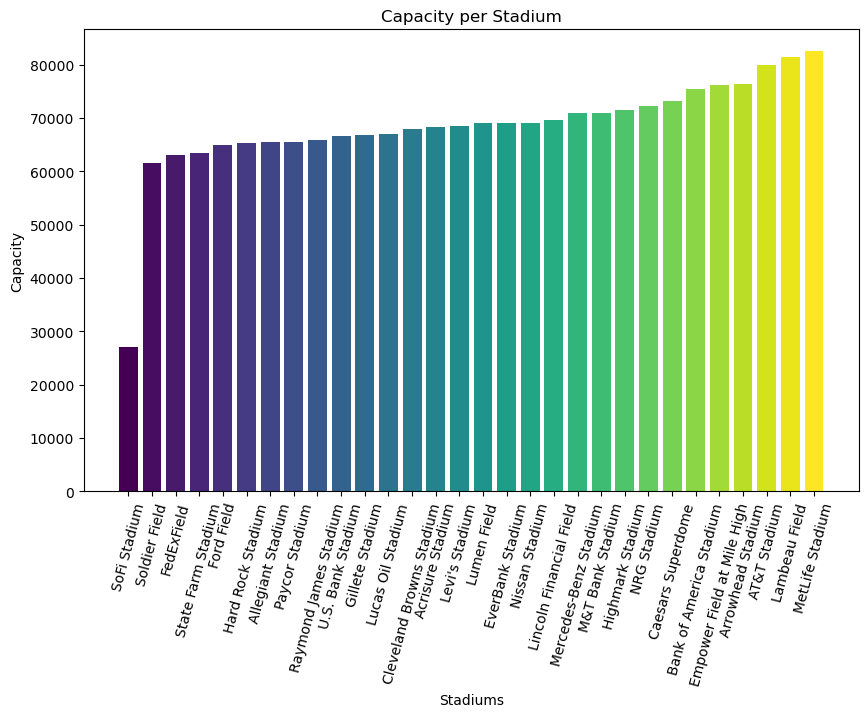

In [57]:
#Plotting capacity for each stadium 
sorted = newstadium_df.sort_values('capacity')
x = sorted['home_stadium']
y = sorted['capacity']
cmap  = plt.get_cmap('viridis')
colors = cmap(np.linspace(0,1, len(x)))
plt.figure(figsize=(10,6))
bar_plot = plt.bar(x,y, color = colors)
plt.xticks(rotation = 75)
plt.xlabel('Stadiums')
plt.ylabel('Capacity')
plt.title('Capacity per Stadium')


In [15]:
#Exporting cleaned data set as CSV 
newstadium_df.to_csv("Resources/cleanStadium.csv",index=False,header=True)